Confusion Matrix: 
 [[99  3]
 [ 5 64]]
Accuracy:  95.32163742690058
Report: 
               precision    recall  f1-score   support

           B       0.95      0.97      0.96       102
           M       0.96      0.93      0.94        69

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



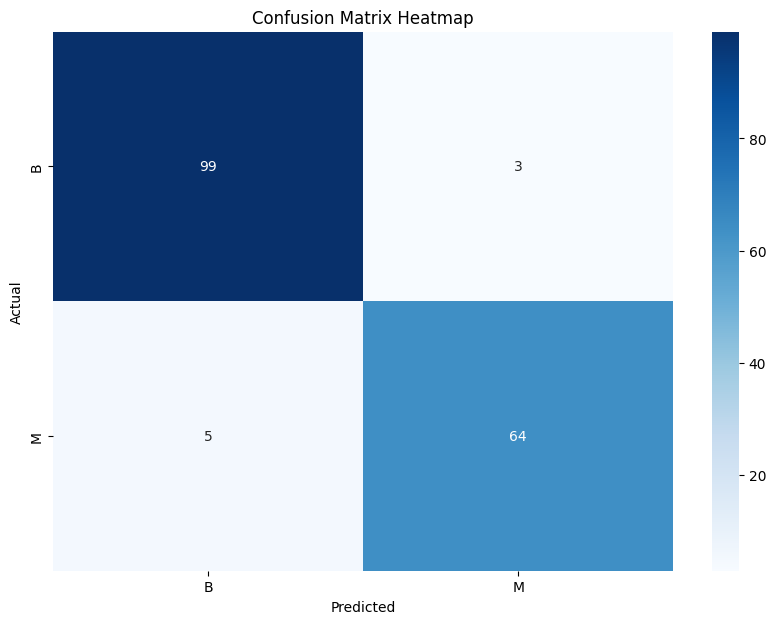

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.decomposition import PCA
import seaborn as sns

# Function to import data
def importdata():
    balance_data = pd.read_csv('/content/data4.csv', sep=',', header=None)
    return balance_data

# Function to split the dataset into features and target variables
def splitdataset(balance_data):
    # Separating the target variable
    X = balance_data.values[:, 2:]
    Y = balance_data.values[:, 1]

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
    return X_train, X_test, y_train, y_test

# Function to calculate and print accuracy
def cal_accuracy(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix: \n", cm)
    print("Accuracy: ", accuracy_score(y_test, y_pred) * 100)
    print("Report: \n", classification_report(y_test, y_pred))
    # Plotting the confusion matrix heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

# Import the data
balance_data = importdata()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = splitdataset(balance_data)

# Create and train the logistic regression model
clf = LogisticRegression(max_iter=10000)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate and print accuracy
cal_accuracy(y_test, y_pred)

